# Pandas Tutorial

**In this tutorial, I have borrowed extensively from others, but have made a concerted effort to synthesize the information in a useful way.**

**It is my hope that, while it serves primarily as my own notes and reference, it can also be a useful resource for the broader community.**

Note: I created and ran the tutorial using python version 3.5.2 and pandas version 0.19.2 though it will probably run on most other python 3 versions as well.

## Load Essential Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import zipfile
import requests

%autosave 0

Autosave disabled


In [2]:
! python --version

Python 3.5.2 :: Continuum Analytics, Inc.


In [3]:
pd.__version__

'0.19.2'

## Load The Data & Do Basic Exploration

In [4]:
df = pd.read_csv('datafiles/mini_movie_data.csv')
df.head()

,movie,actor,rank,studio,bday,male,release_date,production_budget,domestic_gross,worldwide_gross
0,(500) Days of Summer,Chloe Moretz,11,FoxS,1997-02-10,0.0,2009-07-17,7500000.0,32391374.0,59101642.0
1,(500) Days of Summer,Clark Gregg,7,FoxS,1962-04-02,1.0,2009-07-17,7500000.0,32391374.0,59101642.0
2,(500) Days of Summer,Minka Kelly,-,FoxS,1980-06-24,0.0,2009-07-17,7500000.0,32391374.0,59101642.0
3,(500) Days of Summer,Zooey Deschanel,10,FoxS,1980-01-17,0.0,2009-07-17,7500000.0,32391374.0,59101642.0
4,10 Cloverfield Lane,Mary Elizabeth Winstead,4,Par.,1984-11-28,0.0,2016-03-11,5000000.0,69793284.0,101493284.0


In [5]:
df.columns

Index(['movie', 'actor', 'rank', 'studio', 'bday', 'male', 'release_date',
       'production_budget', 'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [6]:
df.describe()

,male,production_budget,domestic_gross,worldwide_gross
count,9342.000000,9.342000e+03,9.342000e+03,9.342000e+03
mean,0.668593,5.082997e+07,6.888544e+07,1.540798e+08
std,0.470744,5.020522e+07,8.230204e+07,2.253854e+08
min,0.000000,1.500000e+04,0.000000e+00,0.000000e+00
25%,0.000000,1.600000e+07,1.503490e+07,2.284500e+07
50%,1.000000,3.500000e+07,4.033402e+07,7.143088e+07
75%,1.000000,6.900000e+07,9.216786e+07,1.857085e+08
max,1.000000,4.250000e+08,7.605076e+08,2.783919e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9342 entries, 0 to 9341
Data columns (total 10 columns):
movie                9342 non-null object
actor                9342 non-null object
rank                 9342 non-null object
studio               9342 non-null object
bday                 9342 non-null object
male                 9342 non-null float64
release_date         9342 non-null object
production_budget    9342 non-null float64
domestic_gross       9342 non-null float64
worldwide_gross      9342 non-null float64
dtypes: float64(4), object(6)
memory usage: 729.9+ KB


## The `rename` function

In [8]:
# rename the 'movie' column to 'title'
# you can rename multiple columns by adding more key:value pairs to the dictionary
df.rename(columns={'movie':'title'}, inplace=True)
df.head(2)

,title,actor,rank,studio,bday,male,release_date,production_budget,domestic_gross,worldwide_gross
0,(500) Days of Summer,Chloe Moretz,11,FoxS,1997-02-10,0.0,2009-07-17,7500000.0,32391374.0,59101642.0
1,(500) Days of Summer,Clark Gregg,7,FoxS,1962-04-02,1.0,2009-07-17,7500000.0,32391374.0,59101642.0


## Basic Indexing and data access

Pandas has two main methods of grabbing data:
* `.loc` for label-based indexing (like row or column names)
* `.iloc` for positional indexing (like array indices)
* There is also `.ix` which tries to do both, but should not generally be used

In [9]:
# get rows starting at index 1 and ending before 3
# and only get from columns at indices 1 and 3
df.iloc[1:3,[1,3]]

,actor,studio
1,Clark Gregg,FoxS
2,Minka Kelly,FoxS


In [10]:
# note that the numbers only work in loc
# because are row labels are actually numbers at the moment
df.loc[1:3,'title':'rank']

,title,actor,rank
1,(500) Days of Summer,Clark Gregg,7
2,(500) Days of Summer,Minka Kelly,-
3,(500) Days of Summer,Zooey Deschanel,10


In [11]:
# these tools allow us to access any arbitrary set of points
# within the dataframe
df.loc[[3,5,8],['actor','studio','rank']]

,actor,studio,rank
3,Zooey Deschanel,FoxS,10
5,Glenn Close,BV,7
8,James Marsden,Think,29


## Boolean Indexing

* Pandas allows you to access data by criterion

In [12]:
# create an array of alternating True and False values
tf_array = [True, False] * (len(df)//2)

In [13]:
# get every other value in the array, up to the 5th element
df.loc[tf_array,:][:5]

,title,actor,rank,studio,bday,male,release_date,production_budget,domestic_gross,worldwide_gross
0,(500) Days of Summer,Chloe Moretz,11,FoxS,1997-02-10,0.0,2009-07-17,7500000.0,32391374.0,59101642.0
2,(500) Days of Summer,Minka Kelly,-,FoxS,1980-06-24,0.0,2009-07-17,7500000.0,32391374.0,59101642.0
4,10 Cloverfield Lane,Mary Elizabeth Winstead,4,Par.,1984-11-28,0.0,2016-03-11,5000000.0,69793284.0,101493284.0
6,102 Dalmatians,Ioan Gruffudd,4,BV,1973-10-06,1.0,2000-11-22,85000000.0,66941559.0,66941559.0
8,10th & Wolf,James Marsden,29,Think,1973-09-18,1.0,2006-08-18,8000000.0,54702.0,143782.0


In [14]:
# this true/false indexing can be directly extended to boolean conditions:

# first clean the data a bit
df['rank'] = df['rank'].replace('-',9999999999999)
df['rank'] = pd.to_numeric(df['rank'])

# get all the movies with rank between 34 and 38 with "Fox" as the studio & domestic_gross < production_budget
df[(df['rank'] >= 34) & (df['rank'] <= 38) & (df['studio']=='Fox') & (df['domestic_gross']<df['production_budget'])]

,title,actor,rank,studio,bday,male,release_date,production_budget,domestic_gross,worldwide_gross
1346,Chain Reaction,Morgan Freeman,36,Fox,1937-06-01,1.0,1996-08-02,55000000.0,20550712.0,59533842.0
3617,Joy,Robert DeNiro,34,Fox,1943-08-17,1.0,2015-12-25,60000000.0,56451232.0,100751232.0
3762,Kiss of Death,Nicolas Cage,35,Fox,1964-01-07,1.0,1995-04-21,40000000.0,14924355.0,14924355.0
4366,Meet Dave,Eddie Murphy,37,Fox,1961-04-03,1.0,2008-07-11,60000000.0,11803254.0,50648806.0
6701,The Big Year,Owen Wilson,34,Fox,1968-11-18,1.0,2011-10-14,41000000.0,7204138.0,7684524.0
6704,The Big Year,Steve Martin,34,Fox,1945-08-14,1.0,2011-10-14,41000000.0,7204138.0,7684524.0


### SettingWithCopy

In [15]:
# another example
f = pd.DataFrame({'a':[1,2,3,4,5], 'b':[10,20,30,40,50]})
f

,a,b
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [16]:
# Let's take only the rows of `b` where `a` is 3 or less, and set the `b` values equal to `b` / 10:
# ! Pitfall - in pandas try to avoid side-by-side square brackets when indexing as it is not guaranteed
# whether the results of the first square bracket return a view or a copy that is then acted on by the
# second square brackets
f[f['a'] <= 3]['b'] = f[f['a'] <= 3 ]['b'] / 10
f

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,a,b
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [17]:
# the correct way to do it is to use .loc and put it all in one set of brackets
f.loc[f['a'] <= 3, 'b'] = f.loc[f['a'] <= 3, 'b'] / 10
f

,a,b
0,1,1.0
1,2,2.0
2,3,3.0
3,4,40.0
4,5,50.0


## Groupby objects

In [18]:
actors =df.groupby('actor')
# this results in a groupby object that we can run functions on or send queries to
actors

In [19]:
# select the first row in each group
# The .head() is just so the printed dataframe doesn't fill the screen - it is optional
actors.first().head(3)

,title,rank,studio,bday,male,release_date,production_budget,domestic_gross,worldwide_gross
actor,,,,,,,,,
Aaron Eckhart,Any Given Sunday,3,WB,1968-03-12,1.0,1999-12-22,60000000.0,75530832.0,100230832.0
Aaron Johnson,Anna Karenina,7,Focus,1990-06-13,1.0,2012-11-16,49000000.0,12816367.0,71004627.0
Abbie Cornish,A Good Year,8,Fox,1982-08-07,0.0,2006-11-10,35000000.0,7459300.0,42064105.0


In [20]:
# select the last row in each group
actors.last().head(3)

,title,rank,studio,bday,male,release_date,production_budget,domestic_gross,worldwide_gross
actor,,,,,,,,,
Aaron Eckhart,The Pledge,13,WB,1968-03-12,1.0,2001-01-19,45000000.0,19719930.0,29406132.0
Aaron Johnson,The Illusionist,9999999999999,YFG,1990-06-13,1.0,2006-08-18,16500000.0,39868642.0,83792062.0
Abbie Cornish,Sucker Punch,4,WB,1982-08-07,0.0,2011-03-25,75000000.0,36392502.0,89758389.0


What you should see from the two results above is that for each actor, we are getting different results in the rest of the columns, as expected.

In [21]:
# take the mean of all rows for each group
# columns which you can't take the mean of will automatically be dropped
actors.mean().head()

,rank,male,production_budget,domestic_gross,worldwide_gross
actor,,,,,
Aaron Eckhart,1.209524e+01,1.0,5.087976e+07,6.033282e+07,1.171763e+08
Aaron Johnson,1.111111e+12,1.0,4.271111e+07,4.884212e+07,1.134827e+08
Abbie Cornish,5.000000e+00,0.0,5.100000e+07,3.156147e+07,8.960463e+07
Abigail Breslin,9.823529e+00,0.0,3.700604e+07,5.992972e+07,1.025613e+08
Adam Brody,3.000000e+12,1.0,2.062500e+07,4.137886e+07,7.525851e+07


In [22]:
# get a group by name
actors.get_group('Aaron Eckhart').head(3)

,bday,domestic_gross,male,production_budget,rank,release_date,studio,title,worldwide_gross
597,1968-03-12,75530832.0,1.0,60000000.0,3,1999-12-22,WB,Any Given Sunday,100230832.0
831,1968-03-12,83552429.0,1.0,70000000.0,5,2011-03-11,Sony,Battle: Los Angeles,213463976.0
1610,1968-03-12,379418.0,1.0,450000.0,24,2006-08-11,Fabr.,Conversations with Other Women,1297745.0


In [23]:
# calling size() on a groupby object will return the number of rows each group contains
actors.size().head()

actor
Aaron Eckhart      21
Aaron Johnson       9
Abbie Cornish       9
Abigail Breslin    17
Adam Brody         10
dtype: int64

In [24]:
# agg() can take a list of functions
# It makes a new column and applies them to each group in a groupby
actors['domestic_gross','worldwide_gross'].agg(['mean','count','std','min','max']).head(10)
# Note that you end up with a multi-index, which we will cover later

domestic_gross                                               \
                           mean count           std         min          max   
actor                                                                          
Aaron Eckhart      6.033282e+07    21  1.138151e+08     17396.0  533345358.0   
Aaron Johnson      4.884212e+07     9  6.081880e+07    115862.0  200672193.0   
Abbie Cornish      3.156147e+07     9  2.706417e+07   4444637.0   79249455.0   
Abigail Breslin    5.992972e+07    17  5.285277e+07    187112.0  227965690.0   
Adam Brody         4.137886e+07    10  5.263487e+07    769726.0  145096820.0   
Adam DeVine        1.243933e+08     2  8.399320e+07  65001093.0  183785415.0   
Adam Sandler       9.154979e+07    28  5.320617e+07   9975684.0  169700110.0   
Adrianne Palicki   8.366492e+07     2  5.495371e+07  44806783.0  122523060.0   
Adrien Brody       4.229720e+07    15  5.760924e+07     12836.0  218080025.0   
Aimee Teegarden    2.415557e+07     2  1.983485e+07  10130219.0   38180928.0   

                 worldwide_gross                                   \
                            mean count           std          min   
actor                                                               
Aaron Eckhart       1.171763e+08    21  2.158466e+08      17396.0   
Aaron Johnson       1.134827e+08     9  1.596594e+08     117796.0   
Abbie Cornish       8.960463e+07     9  7.701140e+07   11229035.0   
Abigail Breslin     1.025613e+08    17  9.785130e+07     597989.0   
Adam Brody          7.525851e+07    10  1.056659e+08     786677.0   
Adam DeVine         2.015199e+08     2  1.208806e+08  116044347.0   
Adam Sandler        1.618510e+08    28  1.110394e+08    9975684.0   
Adrianne Palicki    2.100436e+08     2  2.289321e+08   48164150.0   
Adrien Brody        1.039203e+08    15  1.465820e+08      12836.0   
Aimee Teegarden     5.337639e+07     2  6.026417e+07   10763183.0   

                                
                           max  
actor                           
Aaron Eckhart     1.002891e+09  
Aaron Johnson     5.290722e+08  
Abbie Cornish     2.429818e+08  
Abigail Breslin   4.082657e+08  
Adam Brody        2.865000e+08  
Adam DeVine       2.869954e+08  
Adam Sandler      4.693845e+08  
Adrianne Palicki  3.719231e+08  
Adrien Brody      5.505174e+08  
Aimee Teegarden   9.598959e+07

In [25]:
1e8

100000000.0

In [26]:
# this example illustrates 2 things:
# 1) grouping based on a conditional statement (i.e. is divisible by 3)
# 2) iterating through groups in a groupby
for name, group in df.groupby(df.worldwide_gross%3==0):
    print(name, '\n', group.head(3))
    print('* * *')

False 
                   title         actor           rank studio        bday  male  \
0  (500) Days of Summer  Chloe Moretz             11   FoxS  1997-02-10   0.0   
1  (500) Days of Summer   Clark Gregg              7   FoxS  1962-04-02   1.0   
2  (500) Days of Summer   Minka Kelly  9999999999999   FoxS  1980-06-24   0.0   

  release_date  production_budget  domestic_gross  worldwide_gross  
0   2009-07-17          7500000.0      32391374.0       59101642.0  
1   2009-07-17          7500000.0      32391374.0       59101642.0  
2   2009-07-17          7500000.0      32391374.0       59101642.0  
* * *
True 
                title                 actor  rank studio        bday  male  \
5     102 Dalmatians           Glenn Close     7     BV  1947-03-19   0.0   
6     102 Dalmatians         Ioan Gruffudd     4     BV  1973-10-06   1.0   
12  12 Years a Slave  Benedict Cumberbatch     8   FoxS  1976-07-19   1.0   

   release_date  production_budget  domestic_gross  worldwide_gross  

# Datatypes: type and dtype

* It is always worth keeping track of what the datatypes are in your dataframe
* Pandas provides a number of functions to manage this:

In [27]:
# Review what the dataframe looks like:
df.head(2)

,title,actor,rank,studio,bday,male,release_date,production_budget,domestic_gross,worldwide_gross
0,(500) Days of Summer,Chloe Moretz,11,FoxS,1997-02-10,0.0,2009-07-17,7500000.0,32391374.0,59101642.0
1,(500) Days of Summer,Clark Gregg,7,FoxS,1962-04-02,1.0,2009-07-17,7500000.0,32391374.0,59101642.0


In [28]:
# the info function provides an overview of the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9342 entries, 0 to 9341
Data columns (total 10 columns):
title                9342 non-null object
actor                9342 non-null object
rank                 9342 non-null int64
studio               9342 non-null object
bday                 9342 non-null object
male                 9342 non-null float64
release_date         9342 non-null object
production_budget    9342 non-null float64
domestic_gross       9342 non-null float64
worldwide_gross      9342 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 729.9+ KB


In [29]:
# you can change datatypes by using the pandas.DataFrame.astype function
# which casts to a numpy dtype - in this case we convert everything in the df to a string
df_string = df.astype('str')
df_string.head(2)

,title,actor,rank,studio,bday,male,release_date,production_budget,domestic_gross,worldwide_gross
0,(500) Days of Summer,Chloe Moretz,11,FoxS,1997-02-10,0.0,2009-07-17,7500000.0,32391374.0,59101642.0
1,(500) Days of Summer,Clark Gregg,7,FoxS,1962-04-02,1.0,2009-07-17,7500000.0,32391374.0,59101642.0


In [30]:
df_string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9342 entries, 0 to 9341
Data columns (total 10 columns):
title                9342 non-null object
actor                9342 non-null object
rank                 9342 non-null object
studio               9342 non-null object
bday                 9342 non-null object
male                 9342 non-null object
release_date         9342 non-null object
production_budget    9342 non-null object
domestic_gross       9342 non-null object
worldwide_gross      9342 non-null object
dtypes: object(10)
memory usage: 729.9+ KB


In [31]:
# but we are limited in what we can do, since if we tried to convert a string to 
# an integer or floating point number, it throws an error

## pd.to_numeric()

Converts a series, array or dataframe to a numeric datatype

In [32]:
# example Dataframe of numbers-as-strings
num_example = pd.DataFrame(data=list(zip(list('298576'),list('814309'))),columns=['a','b'])
num_example.head()

,a,b
0,2,8
1,9,1
2,8,4
3,5,3
4,7,0


In [33]:
# if you add columns a and b, they're just concatenated together
num_example.a + num_example.b

0    28
1    91
2    84
3    53
4    70
5    69
dtype: object

In [34]:
# apply pd.to_numeric across the whole dataframe to convert everything to numeric values
num_numeric = num_example.apply(pd.to_numeric)
num_numeric

,a,b
0,2,8
1,9,1
2,8,4
3,5,3
4,7,0
5,6,9


In [35]:
# now adding the columns gives you the sum
num_numeric.a + num_numeric.b

0    10
1    10
2    12
3     8
4     7
5    15
dtype: int64

In [36]:
# this example illustrates 2 things:
# 1) grouping based on a conditional statement (i.e. is an even number)
# 2) iterating through groups in a groupby
for name, group in num_numeric.groupby(num_numeric.a%2==0):
    print(name, '\n', group)
    print('* * *')

False 
    a  b
1  9  1
3  5  3
4  7  0
* * *
True 
    a  b
0  2  8
2  8  4
5  6  9
* * *


# Working with Timestamps and Datetime

In [37]:
# Let's look at our dataframe again
df.head(3)

,title,actor,rank,studio,bday,male,release_date,production_budget,domestic_gross,worldwide_gross
0,(500) Days of Summer,Chloe Moretz,11,FoxS,1997-02-10,0.0,2009-07-17,7500000.0,32391374.0,59101642.0
1,(500) Days of Summer,Clark Gregg,7,FoxS,1962-04-02,1.0,2009-07-17,7500000.0,32391374.0,59101642.0
2,(500) Days of Summer,Minka Kelly,9999999999999,FoxS,1980-06-24,0.0,2009-07-17,7500000.0,32391374.0,59101642.0


In [38]:
# what is the data type (dtype) of the bday column?
df.bday.dtype

dtype('O')

In [39]:
# or check the dtype of the first element
type(df.bday[0])

str

## pd.to_datetime

In [40]:
# convert the columns of date-time strings to pandas Timestamp objects
# we don't use .apply here because we only want to change these 2 specified columns
for datetime_col in ['bday', 'release_date']:
    df[datetime_col] = pd.to_datetime(df[datetime_col])

In [41]:
df.bday.dtype

dtype('<M8[ns]')

In [42]:
type(df.bday[0])

pandas.tslib.Timestamp

## Instant converstion to day/month/year with

** `pd.Series.dt.<day/month/year/second/etc...>` **

In [43]:
print('years', df.bday.dt.year.unique())

years [1997 1962 1980 1984 1947 1973 1974 1976 1959 1977 1963 1983 1966 1967 1978
 1979 1948 1975 1955 1943 1972 1969 1985 1987 1952 1954 1971 1946 1961 1981
 1960 1968 1970 1982 1964 1958 1989 1986 1996 1951 1992 1942 1965 1953 1940
 1929 1950 1937 1933 1936 1930 1931 1934 1938 1956 1957 1939 1949 1944 1990
 1998 1926 1988 1991 2003 1935 1924 1945 1928 1994 1999 1875 1993 1925 1922
 1995]


In [44]:
# this doesn't work:
# df[df.bday > 1995]

# so instead you can compare to a Timestamp or other datetime object
df[df.bday > pd.to_datetime('1-1-1995')].head(2)

,title,actor,rank,studio,bday,male,release_date,production_budget,domestic_gross,worldwide_gross
0,(500) Days of Summer,Chloe Moretz,11,FoxS,1997-02-10,0.0,2009-07-17,7500000.0,32391374.0,59101642.0
85,3 Days to Kill,Hailee Steinfeld,4,Rela.,1996-12-11,0.0,2014-02-21,28000000.0,30697999.0,38959900.0


In [45]:
# or, use the .dt syntax:
df[df.bday.dt.year > 1995].head(2)

,title,actor,rank,studio,bday,male,release_date,production_budget,domestic_gross,worldwide_gross
0,(500) Days of Summer,Chloe Moretz,11,FoxS,1997-02-10,0.0,2009-07-17,7500000.0,32391374.0,59101642.0
85,3 Days to Kill,Hailee Steinfeld,4,Rela.,1996-12-11,0.0,2014-02-21,28000000.0,30697999.0,38959900.0


In [46]:
# Pitfall!
# when you want to select using multiple conditions, watch out for this pandas pitfall
# (this doesn't work:)
# df[2000 > df.bday.dt.year > 1995].head()

In [47]:
# Pitfall!
# Instead, use the bitwise and (&) operator. However...
# (this doesn't work either):
# df[2000 > df.bday.dt.year & df.bday.dt.year > 1995].head()
# Instead, use the bitwise and (&) operator. However...
# (this doesn't work either):
# df[2000 > df.bday.dt.year & df.bday.dt.year > 1995].head()

## Since the '&' operator has a really high precedence in the order of operations, be sure to enclose each condition in parentheses

Eg: `2000 > df.bday.dt.year & df.bday.dt.year > 1995` is evaluated the same as

`2000 > (df.bday.dt.year & df.bday.td.year) > 1995`

In [48]:
# select birthdays between 1995 and 2000, non-inclusive
df[(2000 > df.bday.dt.year) & (df.bday.dt.year > 1995)].head(3)

,title,actor,rank,studio,bday,male,release_date,production_budget,domestic_gross,worldwide_gross
0,(500) Days of Summer,Chloe Moretz,11,FoxS,1997-02-10,0.0,2009-07-17,7500000.0,32391374.0,59101642.0
85,3 Days to Kill,Hailee Steinfeld,4,Rela.,1996-12-11,0.0,2014-02-21,28000000.0,30697999.0,38959900.0
307,After Earth,Jaden Smith,4,Sony,1998-07-08,1.0,2013-05-31,130000000.0,60522097.0,251499665.0


In [49]:
# example of .dt.month
# Note: you rarely need to add columns like this!! You can use .dt directly for a groupby or for a selection
df2 = df.copy()
df2['release_month'] = df2.release_date.dt.month
df2.head(3)

,title,actor,rank,studio,bday,male,release_date,production_budget,domestic_gross,worldwide_gross,release_month
0,(500) Days of Summer,Chloe Moretz,11,FoxS,1997-02-10,0.0,2009-07-17,7500000.0,32391374.0,59101642.0,7
1,(500) Days of Summer,Clark Gregg,7,FoxS,1962-04-02,1.0,2009-07-17,7500000.0,32391374.0,59101642.0,7
2,(500) Days of Summer,Minka Kelly,9999999999999,FoxS,1980-06-24,0.0,2009-07-17,7500000.0,32391374.0,59101642.0,7


In [50]:
monthly_mean = df.groupby(df.release_date.dt.month).mean()
monthly_mean.head(3)

,rank,male,production_budget,domestic_gross,worldwide_gross
release_date,,,,,
1,1195928753192,0.674300,3.260153e+07,3.810404e+07,7.400509e+07
2,1059027777788,0.635417,4.066693e+07,4.773956e+07,9.061837e+07
3,855614973272,0.664439,4.960052e+07,6.042128e+07,1.255552e+08


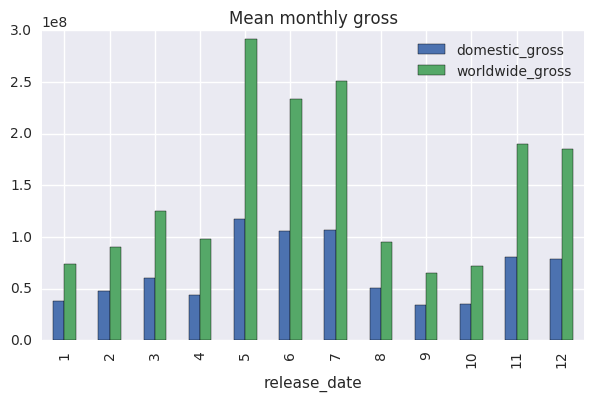

In [51]:
monthly_mean[['domestic_gross','worldwide_gross']].plot.bar(title='Mean monthly gross',figsize=(7,4))

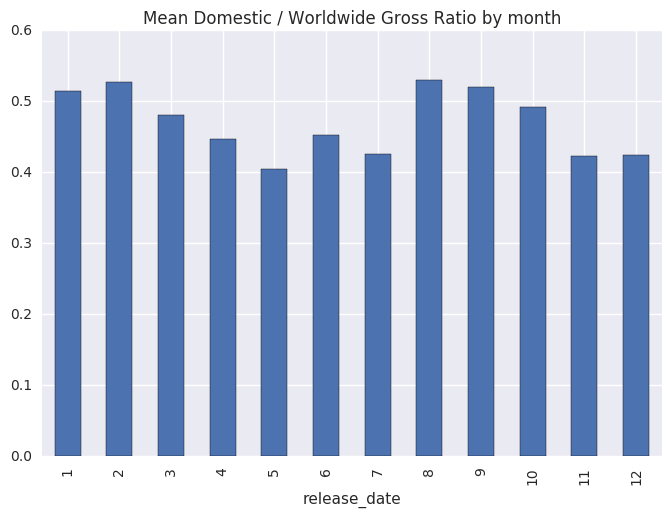

In [52]:
# you don't need to make a new column for a one-off
(monthly_mean.domestic_gross / monthly_mean.worldwide_gross).plot.bar(title='Mean Domestic / Worldwide Gross Ratio by month')

## Let's get month names on the x-axis instead using `calendar library`

In [53]:
import calendar

# we have the option of full name of month, or abbreviated name
print(calendar.month_name[1:4])
print(calendar.month_abbr[1:4])

['January', 'February', 'March']
['Jan', 'Feb', 'Mar']


In [54]:
# map over the index of using calendar's month names
monthly_mean.index = monthly_mean.index.map(lambda x: calendar.month_abbr[x])
monthly_mean

,rank,male,production_budget,domestic_gross,worldwide_gross
Jan,1195928753192,0.674300,3.260153e+07,3.810404e+07,7.400509e+07
Feb,1059027777788,0.635417,4.066693e+07,4.773956e+07,9.061837e+07
Mar,855614973272,0.664439,4.960052e+07,6.042128e+07,1.255552e+08
Apr,1133720930244,0.635174,3.608773e+07,4.362819e+07,9.773371e+07
May,1255349500721,0.670471,8.347447e+07,1.177966e+08,2.914820e+08
Jun,1754601227000,0.693252,7.135558e+07,1.056504e+08,2.331871e+08
Jul,1550190597212,0.691233,6.919861e+07,1.067479e+08,2.508663e+08
Aug,1179487179497,0.685897,3.949550e+07,5.043031e+07,9.527081e+07
Sep,936675461754,0.646438,3.078705e+07,3.375987e+07,6.493184e+07
Oct,1147928994095,0.649704,3.106601e+07,3.545069e+07,7.204215e+07


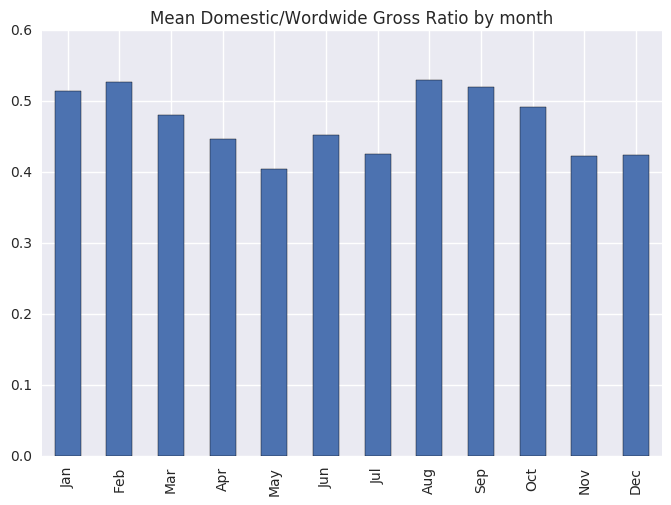

In [55]:
# now we have month abbreviations as x lables when we plot
(monthly_mean.domestic_gross / monthly_mean.worldwide_gross).plot.bar(title='Mean Domestic/Wordwide Gross Ratio by month')

## The resample method

A convenient way to bin timeseries data

**Warning:** resample only works with a Timestamp-indexed dataframe. You can always set your index to your datetime column of interest `df.set_index('datetime_column)` to make this work

In [56]:
# let's look at moves of a given actor, by year
actor_df = df[df.actor=='Samuel L. Jackson'].drop('male', axis=1)
actor_df.sort_values('release_date').head()

,title,actor,rank,studio,bday,release_date,production_budget,domestic_gross,worldwide_gross
5734,School Daze,Samuel L. Jackson,9999999999999,Col.,1948-12-21,1988-02-12,6000000.0,14545844.0,14545844.0
1933,Do the Right Thing,Samuel L. Jackson,9999999999999,Uni.,1948-12-21,1989-06-30,6000000.0,24289231.0,24289231.0
5785,Sea of Love,Samuel L. Jackson,9999999999999,Uni.,1948-12-21,1989-09-15,19000000.0,53350495.0,53350495.0
4491,Mo' Better Blues,Samuel L. Jackson,9999999999999,Uni.,1948-12-21,1990-08-03,10000000.0,16153000.0,16153000.0
2758,Goodfellas,Samuel L. Jackson,9999999999999,WB,1948-12-21,1990-09-19,25000000.0,46261759.0,46261759.0


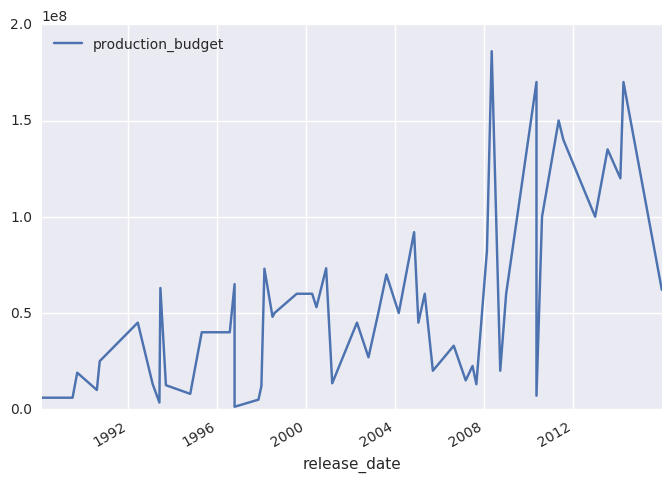

In [57]:
# visualize what the data looks like now: it's irregular by year
actor_df.plot('release_date','production_budget')

In [58]:
# take the mean of all the numerical columns
actor_df.set_index('release_date').resample('AS').mean().head()

,rank,production_budget,domestic_gross,worldwide_gross
release_date,,,,
1988-01-01,1.000000e+13,6000000.0,14545844.0,14545844.0
1989-01-01,1.000000e+13,12500000.0,38819863.0,38819863.0
1990-01-01,1.000000e+13,17500000.0,31207379.5,31207379.5
1991-01-01,NaN,NaN,NaN,NaN
1992-01-01,1.000000e+13,45000000.0,83287363.0,178100000.0


### Note that by default, missing bins get replaced with a NaN row. This can be useful if you want to set a default value for the missing bins

In [59]:
# same as above, but fill all NaNs with 0
actor_df.set_index('release_date').resample('AS').mean().fillna(0).head()

,rank,production_budget,domestic_gross,worldwide_gross
release_date,,,,
1988-01-01,1.000000e+13,6000000.0,14545844.0,14545844.0
1989-01-01,1.000000e+13,12500000.0,38819863.0,38819863.0
1990-01-01,1.000000e+13,17500000.0,31207379.5,31207379.5
1991-01-01,0.000000e+00,0.0,0.0,0.0
1992-01-01,1.000000e+13,45000000.0,83287363.0,178100000.0


In [60]:
# if we want 5-year bins instead, we can plug in a 5 to the resample "rule": '5AS'
actor_df.set_index('release_date').resample('5AS').mean()

,rank,production_budget,domestic_gross,worldwide_gross
release_date,,,,
1988-01-01,1.000000e+13,1.850000e+07,3.964795e+07,5.545005e+07
1993-01-01,2.727273e+12,2.393636e+07,7.105578e+07,1.462092e+08
1998-01-01,1.000000e+12,5.027560e+07,4.919147e+07,8.413794e+07
2003-01-01,3.290909e+01,4.277273e+07,5.912338e+07,1.154025e+08
2008-01-01,2.727273e+12,9.595455e+07,1.294431e+08,2.701183e+08
2013-01-01,2.200000e+01,1.217500e+08,1.138697e+08,3.472769e+08


## resample resolutions available [(via SO answer)](http://stackoverflow.com/a/17001474):

    B       business day frequency
    C       custom business day frequency (experimental)
    D       calendar day frequency
    W       weekly frequency
    M       month end frequency
    BM      business month end frequency
    CBM     custom business month end frequency
    MS      month start frequency
    BMS     business month start frequency
    CBMS    custom business month start frequency
    Q       quarter end frequency
    BQ      business quarter endfrequency
    QS      quarter start frequency
    BQS     business quarter start frequency
    A       year end frequency
    BA      business year end frequency
    AS      year start frequency
    BAS     business year start frequency
    BH      business hour frequency
    H       hourly frequency
    T       minutely frequency
    S       secondly frequency
    L       milliseonds
    U       microseconds
    N       nanoseconds

In [61]:
# let's say we want the mean, and also the count
# we can pass a list of methods using 'apply'
yr_bins = actor_df.set_index('release_date').resample('5AS').apply(['mean','count','sem'])
yr_bins.head()

rank                     production_budget        \
                      mean count           sem              mean count   
release_date                                                             
1988-01-01    1.000000e+13     6  0.000000e+00      1.850000e+07     6   
1993-01-01    2.727273e+12    11  1.408358e+12      2.393636e+07    11   
1998-01-01    1.000000e+12    10  1.000000e+12      5.027560e+07    10   
2003-01-01    3.290909e+01    11  4.909091e+00      4.277273e+07    11   
2008-01-01    2.727273e+12    11  1.408358e+12      9.595455e+07    11   

                           domestic_gross                     worldwide_gross  \
                       sem           mean count           sem            mean   
release_date                                                                    
1988-01-01    6.135960e+06   3.964795e+07     6  1.088412e+07    5.545005e+07   
1993-01-01    7.175555e+06   7.105578e+07    11  3.427397e+07    1.462092e+08   
1998-01-01    5.932781e+06   4.919147e+07    10  9.543079e+06    8.413794e+07   
2003-01-01    7.540004e+06   5.912338e+07    11  2.268627e+07    1.154025e+08   
2008-01-01    1.828343e+07   1.294431e+08    11  3.411070e+07    2.701183e+08   

                                  
             count           sem  
release_date                      
1988-01-01       6  2.537732e+07  
1993-01-01      11  9.151223e+07  
1998-01-01      10  2.357590e+07  
2003-01-01      11  5.307465e+07  
2008-01-01      11  7.069114e+07

In [62]:
# or you can get very fancy and pass a dict of dicts
# the first key references the DataFrames' original column name while
# the second key defines the name of a new column
yr_bins = actor_df.set_index('release_date').resample('5AS').apply({
        'production_budget':{'avg':'mean', 'ct':'count', 'stdEm':'sem'},
        'domestic_gross':{'low':'min', 'high':'max'},
        'worldwide_gross':{'total':'sum'}})
yr_bins

domestic_gross              worldwide_gross production_budget  \
                        low         high           total             stdEm   
release_date                                                                 
1988-01-01       14545844.0   83287363.0    3.327003e+08      6.135960e+06   
1993-01-01         749741.0  395708305.0    1.608301e+09      7.175555e+06   
1998-01-01         687081.0   94999143.0    8.413794e+08      5.932781e+06   
2003-01-01        3172382.0  261441092.0    1.269428e+09      7.540004e+06   
2008-01-01        1110509.0  318604126.0    2.971301e+09      1.828343e+07   
2013-01-01       54096599.0  259746958.0    1.389107e+09      2.250324e+07   

                                
                       avg  ct  
release_date                    
1988-01-01    1.850000e+07   6  
1993-01-01    2.393636e+07  11  
1998-01-01    5.027560e+07  10  
2003-01-01    4.277273e+07  11  
2008-01-01    9.595455e+07  11  
2013-01-01    1.217500e+08   4

### Special note: try not to use method names as column names. It will make indexing more annoying.

#### For example, a column named 'mean' will cause a collision when you call df.mean with the function call having precedence

You will only be able to acced the column like: `df['mean']

## Multiindexing

In [63]:
yr_bins.head(3)

domestic_gross              worldwide_gross production_budget  \
                        low         high           total             stdEm   
release_date                                                                 
1988-01-01       14545844.0   83287363.0    3.327003e+08      6.135960e+06   
1993-01-01         749741.0  395708305.0    1.608301e+09      7.175555e+06   
1998-01-01         687081.0   94999143.0    8.413794e+08      5.932781e+06   

                                
                       avg  ct  
release_date                    
1988-01-01    1.850000e+07   6  
1993-01-01    2.393636e+07  11  
1998-01-01    5.027560e+07  10

In [64]:
yr_bins.production_budget.head(2)

,stdEm,avg,ct
release_date,,,
1988-01-01,6.135960e+06,1.850000e+07,6
1993-01-01,7.175555e+06,2.393636e+07,11


In [65]:
# chaining the dot column name syntax is fine
yr_bins.production_budget.avg

release_date
1988-01-01    1.850000e+07
1993-01-01    2.393636e+07
1998-01-01    5.027560e+07
2003-01-01    4.277273e+07
2008-01-01    9.595455e+07
2013-01-01    1.217500e+08
Freq: 5AS-JAN, Name: avg, dtype: float64

In [66]:
# you can also index both levels of the column index by name, as strings
yr_bins['production_budget','avg']

release_date
1988-01-01    1.850000e+07
1993-01-01    2.393636e+07
1998-01-01    5.027560e+07
2003-01-01    4.277273e+07
2008-01-01    9.595455e+07
2013-01-01    1.217500e+08
Freq: 5AS-JAN, Name: (production_budget, avg), dtype: float64

## Flattening a multi-level column index

### Use a list comprehension to rewrite the column names

In [67]:
yr_bins.head(2)

domestic_gross              worldwide_gross production_budget  \
                        low         high           total             stdEm   
release_date                                                                 
1988-01-01       14545844.0   83287363.0    3.327003e+08      6.135960e+06   
1993-01-01         749741.0  395708305.0    1.608301e+09      7.175555e+06   

                                
                       avg  ct  
release_date                    
1988-01-01    1.850000e+07   6  
1993-01-01    2.393636e+07  11

In [68]:
print(yr_bins.columns.values)

[('domestic_gross', 'low') ('domestic_gross', 'high')
 ('worldwide_gross', 'total') ('production_budget', 'stdEm')
 ('production_budget', 'avg') ('production_budget', 'ct')]


In [69]:
yr_bins_flat = yr_bins.copy()
# use an underscore as delimiter is an optional convention
yr_bins_flat.columns = ['_'.join(col) for col in yr_bins.columns.values]
yr_bins_flat.head(2)

,domestic_gross_low,domestic_gross_high,worldwide_gross_total,production_budget_stdEm,production_budget_avg,production_budget_ct
release_date,,,,,,
1988-01-01,14545844.0,83287363.0,3.327003e+08,6.135960e+06,1.850000e+07,6
1993-01-01,749741.0,395708305.0,1.608301e+09,7.175555e+06,2.393636e+07,11


In [70]:
# you can also access specific index levels using the get_level_values function
yr_bins.columns

MultiIndex(levels=[['domestic_gross', 'worldwide_gross', 'production_budget'], ['avg', 'ct', 'high', 'low', 'stdEm', 'total']],
           labels=[[0, 0, 1, 2, 2, 2], [3, 2, 5, 4, 0, 1]])

In [71]:
yr_bins.columns.get_level_values(0)

Index(['domestic_gross', 'domestic_gross', 'worldwide_gross',
       'production_budget', 'production_budget', 'production_budget'],
      dtype='object')

In [72]:
yr_bins.columns.get_level_values(1)

Index(['low', 'high', 'total', 'stdEm', 'avg', 'ct'], dtype='object')

## `pd.cut()`: bins numeric values and converts to categorical values

In [73]:
# make some fake data
no_movies = 10
ratings_df = pd.DataFrame.from_dict({
        'rating_no': pd.np.random.rand(no_movies),
        'movie': df.title.sample(no_movies)
    })

# fake gross based on fake rating
ratings_df['gross'] = pd.np.round(ratings_df.rating_no*100000000, decimals=2)

# save this unmodified version for later
ratings_df_orig = ratings_df.copy()

ratings_df

,movie,rating_no,gross
924,Beyond Borders,0.357448,35744753.20
8929,Wag the Dog,0.958622,95862182.92
3969,Life as a House,0.400958,40095753.26
7136,The Four Feathers,0.018581,1858052.17
5782,Screwed,0.899064,89906374.14
7648,The Lord of the Rings: The Fellowship of the Ring,0.253054,25305418.54
4175,Mad Money,0.996106,99610640.67
7803,The Mummy Returns,0.554129,55412942.30
8871,Valkyrie,0.723588,72358788.24
5123,Pinocchio,0.940303,94030318.55


In [74]:
# cut numerical ratings into N bins

# here's what the labels default to when you don't define your own lables
ratings_df['rating_category_ugly'] = pd.cut(ratings_df.rating_no, bins=4)

# you can substitute whatever labels you want
ratings_df['rating_category'] = pd.cut(ratings_df.rating_no, bins=4, labels=['bad','mediocre','good','excellent'])

ratings_df

,movie,rating_no,gross,rating_category_ugly,rating_category
924,Beyond Borders,0.357448,35744753.20,"(0.263, 0.507]",mediocre
8929,Wag the Dog,0.958622,95862182.92,"(0.752, 0.996]",excellent
3969,Life as a House,0.400958,40095753.26,"(0.263, 0.507]",mediocre
7136,The Four Feathers,0.018581,1858052.17,"(0.0176, 0.263]",bad
5782,Screwed,0.899064,89906374.14,"(0.752, 0.996]",excellent
7648,The Lord of the Rings: The Fellowship of the Ring,0.253054,25305418.54,"(0.0176, 0.263]",bad
4175,Mad Money,0.996106,99610640.67,"(0.752, 0.996]",excellent
7803,The Mummy Returns,0.554129,55412942.30,"(0.507, 0.752]",good
8871,Valkyrie,0.723588,72358788.24,"(0.507, 0.752]",good
5123,Pinocchio,0.940303,94030318.55,"(0.752, 0.996]",excellent


In [75]:
# `pd.cut` gives us an excellent way to groupby based on bins
# Eg. we can use the new categorical ratings to find the mean gross for each rating bin
print('mean gross for each rating bin')
ratings_df.groupby('rating_category').mean()

mean gross for each rating bin


,rating_no,gross
rating_category,,
bad,0.135817,1.358174e+07
mediocre,0.379203,3.792025e+07
good,0.638859,6.388587e+07
excellent,0.948524,9.485238e+07


In [76]:
# Even if we didn't care about assigning labels like 'bad', 'mediocre' etc to the rating numbers
# pd.cut is still very useful if we want to groupby on binned numerical data

# We can do this as a one-liner, using the copy of the original ratings_df before we added the extra columns
ratings_df_orig.groupby(pd.cut(ratings_df_orig.rating_no,bins=5),as_index=False).mean()

,rating_no,gross
0,0.018581,1.858052e+06
1,0.337153,3.371531e+07
2,0.554129,5.541294e+07
3,0.723588,7.235879e+07
4,0.948524,9.485238e+07


# Random Useful Functions

## isin

In [77]:
# which female actors appear most often in the dataset?
top_actresses = df[df.male==0].groupby('actor').size().sort_values(ascending=False).head()
top_actresses

actor
Susan Sarandon      33
Julia Roberts       32
Julianne Moore      31
Cate Blanchett      30
Sigourney Weaver    29
dtype: int64

In [78]:
# often we want to select all rows where a column contains any value in a list
# eg. select all rows where df.actor is in our list of actors
actor_list = ['Susan Sarandon','Julia Roberts']

# use pandas.DataFrame.isin to find all the movies that have at least one of the actors in our list
df[df.actor.isin(actor_list)].head()

,title,actor,rank,studio,bday,male,release_date,production_budget,domestic_gross,worldwide_gross
353,Alfie,Susan Sarandon,32,Par.,1946-10-04,0.0,2004-11-05,40000000.0,13395939.0,35195939.0
442,America's Sweethearts,Julia Roberts,14,SonR,1967-10-28,0.0,2001-07-20,46000000.0,93607673.0,160648493.0
607,Anywhere But Here,Susan Sarandon,25,Fox,1946-10-04,0.0,1999-11-12,23000000.0,18653615.0,18653615.0
624,Arbitrage,Susan Sarandon,39,RAtt.,1946-10-04,0.0,2012-09-14,12000000.0,7919574.0,35830713.0
686,August: Osage County,Julia Roberts,28,Wein.,1967-10-28,0.0,2013-12-25,25000000.0,37738810.0,50738810.0


## unique

In [79]:
# how many unique studio names are there?
print(len(df.studio.unique()))

151


In [80]:
print(df.studio.unique())

['FoxS' 'Par.' 'BV' 'Think' 'Fox' 'MGM/W' 'NL' 'WB' 'WB (NL)' 'Uni.' 'Sony'
 'SPC' 'Focus' 'Rela.' 'FoxA' 'LGF' 'Mira.' 'Anch.' 'Sum.' 'Orion' 'UA'
 'Col.' 'MGM' 'ORF' 'WIP' 'ParV' 'A24' 'RAtt.' 'PicH' 'Cinc' 'Wein.' 'P/DW'
 'FRun' 'SGem' 'SonR' 'Lori' 'NM' 'LG/S' 'Magn.' 'Strand' 'DW' 'Eros'
 'Lions' 'FL' 'Vari.' 'Viv.' 'CE' 'VE' 'P4' 'First' 'Echo' 'RTWC' 'Dim.'
 'CBS' 'USA' 'MNE' 'Circ' 'Rom.' 'Can.' 'Film' 'Art.' 'FFn.' 'Free' 'IFC'
 'App.' 'CityL' 'Over.' 'ATO' 'Gram.' 'TriS' 'AL' 'IDP' 'ParC' 'Fabr.'
 'WGUSA' 'BST' 'FD' 'Wells' 'Dar.' 'Gold.' 'Acc.' 'Imag.' 'BDF' 'Dest.'
 'OMNI/FSR' 'TRR' 'FInd.' 'Emb' 'Trim.' 'Vita.' 'YFG' 'Ode.' 'Drft.'
 'Roxie' 'W/Dim.' 'Good' 'Cow.' 'LGP' 'WHE' 'Prior.' 'Rog.' 'Code' 'LD'
 'Oct.' 'PMKBNC' 'Lot47' 'NCeV' 'E1' 'IA' 'Mont.' 'RS' 'Osci.' 'PH' 'AIP'
 'AFFRM' 'NYer' 'RCR' 'IMG/B' 'GldC' 'NW' 'SMod' 'Isld' 'Boro.' 'Slow'
 'Sav.' 'RKO' 'TFA' 'Istr' 'Triu' 'Alc' 'Atl' 'Cohen' 'Indic.' 'Poly'
 'Scre.' 'STX' 'Pala.' 'Saban' 'SenD' 'Strat.' 'Mang.' 'AFD'

In [81]:
# unique values are unsorted so if you want them sorted...
print(sorted(df.studio.unique()))

['A24', 'AFD', 'AFFRM', 'AIP', 'AL', 'ATO', 'Acc.', 'Alc', 'Anch.', 'App.', 'Art.', 'Atl', 'BDF', 'BPic', 'BST', 'BV', 'Boro.', 'CBS', 'CE', 'Can.', 'Cinc', 'Circ', 'CityL', 'Code', 'Cohen', 'Col.', 'Cow.', 'DW', 'Dar.', 'Dest.', 'Dim.', 'Drft.', 'E1', 'Echo', 'Emb', 'Eros', 'Excel', 'FCW', 'FD', 'FFn.', 'FInd.', 'FL', 'FRun', 'Fabr.', 'Film', 'First', 'Focus', 'Fox', 'FoxA', 'FoxS', 'Free', 'GK', 'GldC', 'Gold.', 'Good', 'Gram.', 'IA', 'IDP', 'IFC', 'IMG/B', 'IW', 'Imag.', 'Indic.', 'Isld', 'Istr', 'LD', 'LG/S', 'LGF', 'LGP', 'Lions', 'Lori', 'Lot47', 'MGM', 'MGM/W', 'MNE', 'Magn.', 'Mang.', 'Mira.', 'Mont.', 'NCeV', 'NL', 'NM', 'NW', 'NYer', 'NxtM', 'OMNI/FSR', 'ORF', 'Oct.', 'Ode.', 'Orion', 'OrionC', 'Osci.', 'Over.', 'P/DW', 'P4', 'PH', 'PMKBNC', 'Pala.', 'Par.', 'ParC', 'ParV', 'PicH', 'Poly', 'Prior.', 'RAtt.', 'RCR', 'RKO', 'RM', 'RS', 'RTWC', 'Reg.', 'Rela.', 'Rog.', 'Rom.', 'Roxie', 'SGem', 'SMod', 'SPC', 'STX', 'Saban', 'Sav.', 'Scre.', 'SenD', 'Slow', 'SonR', 'Sony', 'Stran

## Using seaborn's groupby support

In [82]:
! pip install --upgrade seaborn -q
import seaborn as sns

In [83]:
n_top = 15
# we only want one row per movie, we don't care about actors
by_movie_df = df.groupby('title').first()
by_movie_df.head(3)

,actor,rank,studio,bday,male,release_date,production_budget,domestic_gross,worldwide_gross
title,,,,,,,,,
(500) Days of Summer,Chloe Moretz,11,FoxS,1997-02-10,0.0,2009-07-17,7500000.0,32391374.0,59101642.0
10 Cloverfield Lane,Mary Elizabeth Winstead,4,Par.,1984-11-28,0.0,2016-03-11,5000000.0,69793284.0,101493284.0
102 Dalmatians,Glenn Close,7,BV,1947-03-19,0.0,2000-11-22,85000000.0,66941559.0,66941559.0


In [84]:
# select only the top N studios, by total production budget of all movies
top_studio_names = by_movie_df.groupby('studio').sum().sort_values('production_budget', ascending=False).index[:n_top]

top_studio_df = by_movie_df[by_movie_df.studio.isin(top_studio_names)]

In [85]:
top_studio_df.head(4)

,actor,rank,studio,bday,male,release_date,production_budget,domestic_gross,worldwide_gross
title,,,,,,,,,
10 Cloverfield Lane,Mary Elizabeth Winstead,4,Par.,1984-11-28,0.0,2016-03-11,5000000.0,69793284.0,101493284.0
102 Dalmatians,Glenn Close,7,BV,1947-03-19,0.0,2000-11-22,85000000.0,66941559.0,66941559.0
12 Rounds,John Cena,4,Fox,1977-04-23,1.0,2009-03-27,20000000.0,12234694.0,17306648.0
13 Hours: The Secret Soldiers of Benghazi,John Krasinski,4,Par.,1979-10-20,1.0,2016-01-15,50000000.0,52853219.0,68053219.0


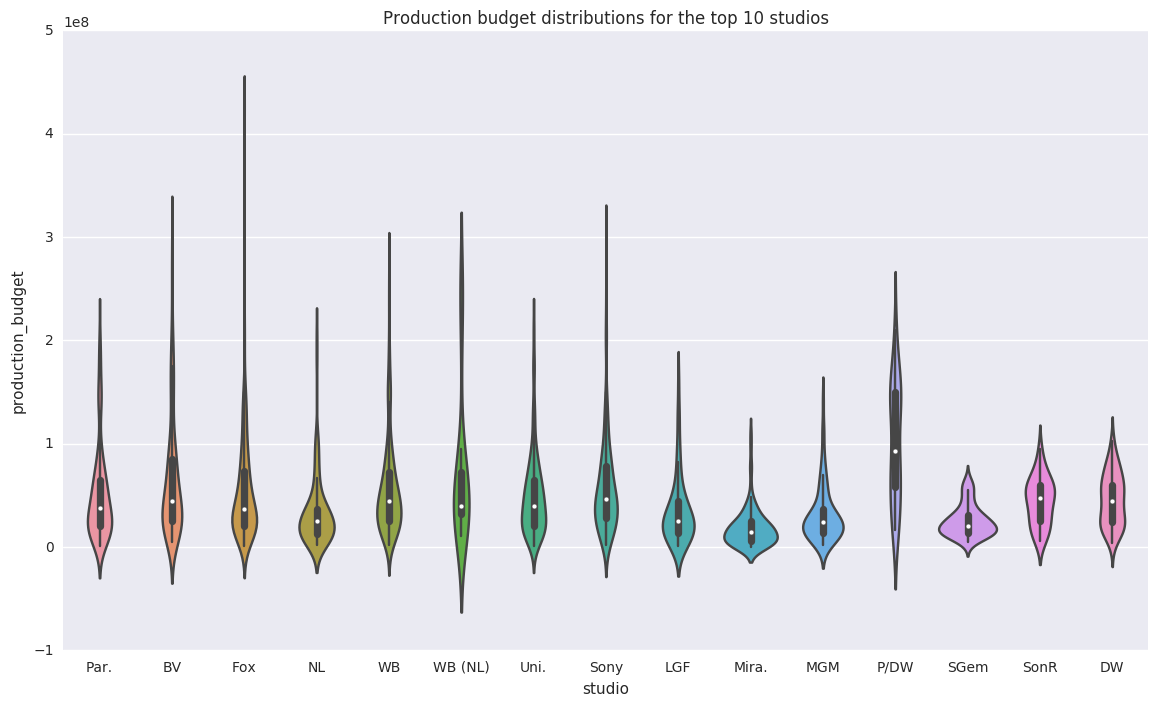

In [86]:
plt.figure(figsize=(14,8))

# we pass the studio column to sns.violinplot
# sns.violinplot(top_studio_df.production_budget, groupby=top_studio_df.studio) # old syntax
sns.violinplot('studio','production_budget',data=top_studio_df) # new syntax
plt.title('Production budget distributions for the top 10 studios');